# Step 1: Understand the Data and the Problem

* Read the data
* View the data
* Check the data dimensions
* Check the data type

## Problem

Understand and predict the relationship between medical insurance **charges** (numerical), and the features

1. age (numerical)
2. sex (categorical)
3. bmi (numerical)
4. children (numerical)
5. smoker (categorical)
6. region (categorical)

In [1]:
#loading the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
#reading the file
df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')

# looking into the dataframe
df.head()
print(df.shape)
df.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Step 2: Univariate Sample Distribution of Data

Univariate Sample Distribution helps one to understand how each feature, and the response variable is distributed. This may give insights into data preprocessing for better model performance, and interpretability. One can use 

* histogram for visualizing numerical feature
* count plot for visualizing categorical feature

## Interpretation

* A monotonic log transform on the charges, since there are large values, which may result in unstable optimization. Initially, it is not applied, and basic analysis is performed.

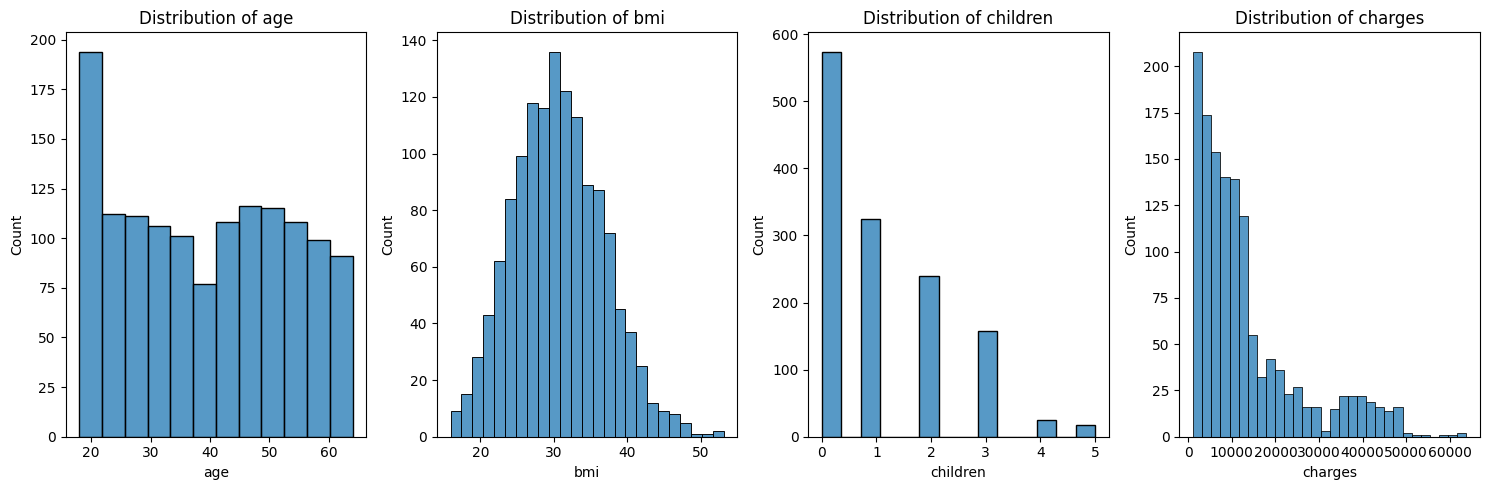

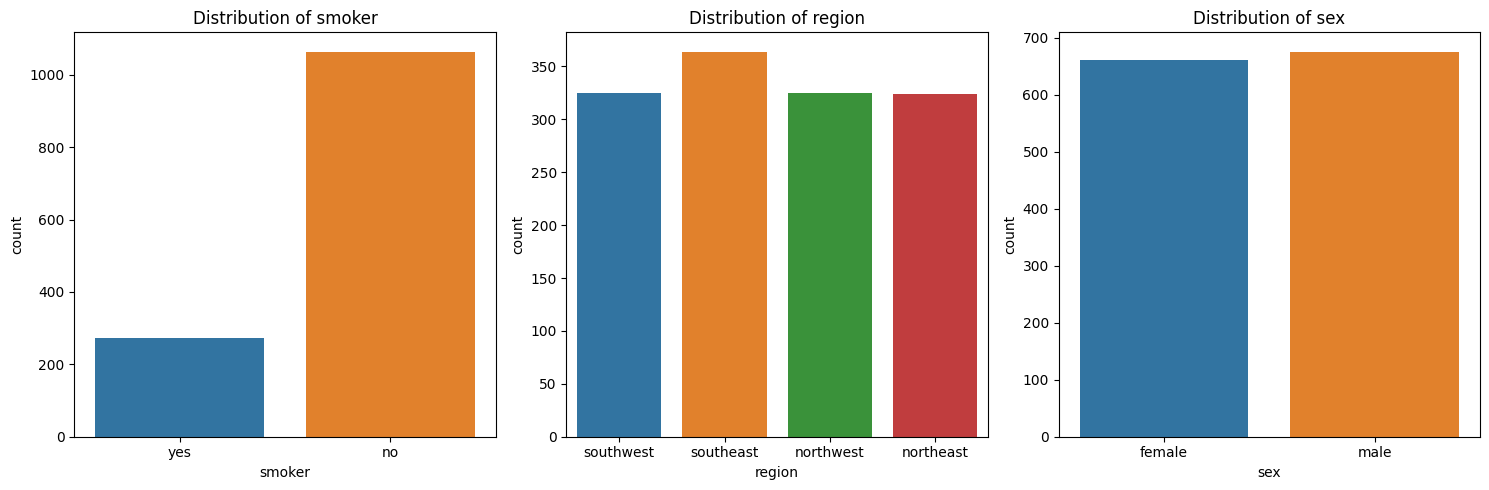

In [3]:
# Suppress the FutureWarning from modules
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['smoker', 'region', 'sex']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Step 3: Bivariate Sample Relationship of Charges with Features

Bivariate Sample Distribution of response variable may help one helps one to understand how the response variable is individually related to each of the feature. This can help us understand visually, which may be the most important variable for prediction. This can also show multivariate relationship, mostly related to the important features discovered.

* In this problem, you will see a beautiful multivariate relationship, which is coming in the next step.

## Interpretation


* scatterplot for visualizing numerical (charges) vs numerical features
* grouped kernel density plot for visualizing numerical (charges) vs categorical features
* the smoker is the most important variable, since the two kernel densities based on smokers and non smokers, are very distinct
* both the scatter plots of charges vs age and bmi individually shows significant relationships
* there seem to be unknown third variable effect leading to distinct behaviours
* both the age and bmi seems to have multiple distinct processes happening behind the scence. the processes seem to be distinct. 
* hence the best guess is to invoke the smoker variable along with age and bmi, because age shows significant predictive relationship from the grouped kernel density plot
* there seem to be a slight increasing till 2-3 children, and then decreasing after that relationship with charges.
* we will look into a multivariate plot of charges with (age, smoker), (bmi, smoker), and (children, smoker) in the next step.
* other features don't seem to have any effect on the charges.



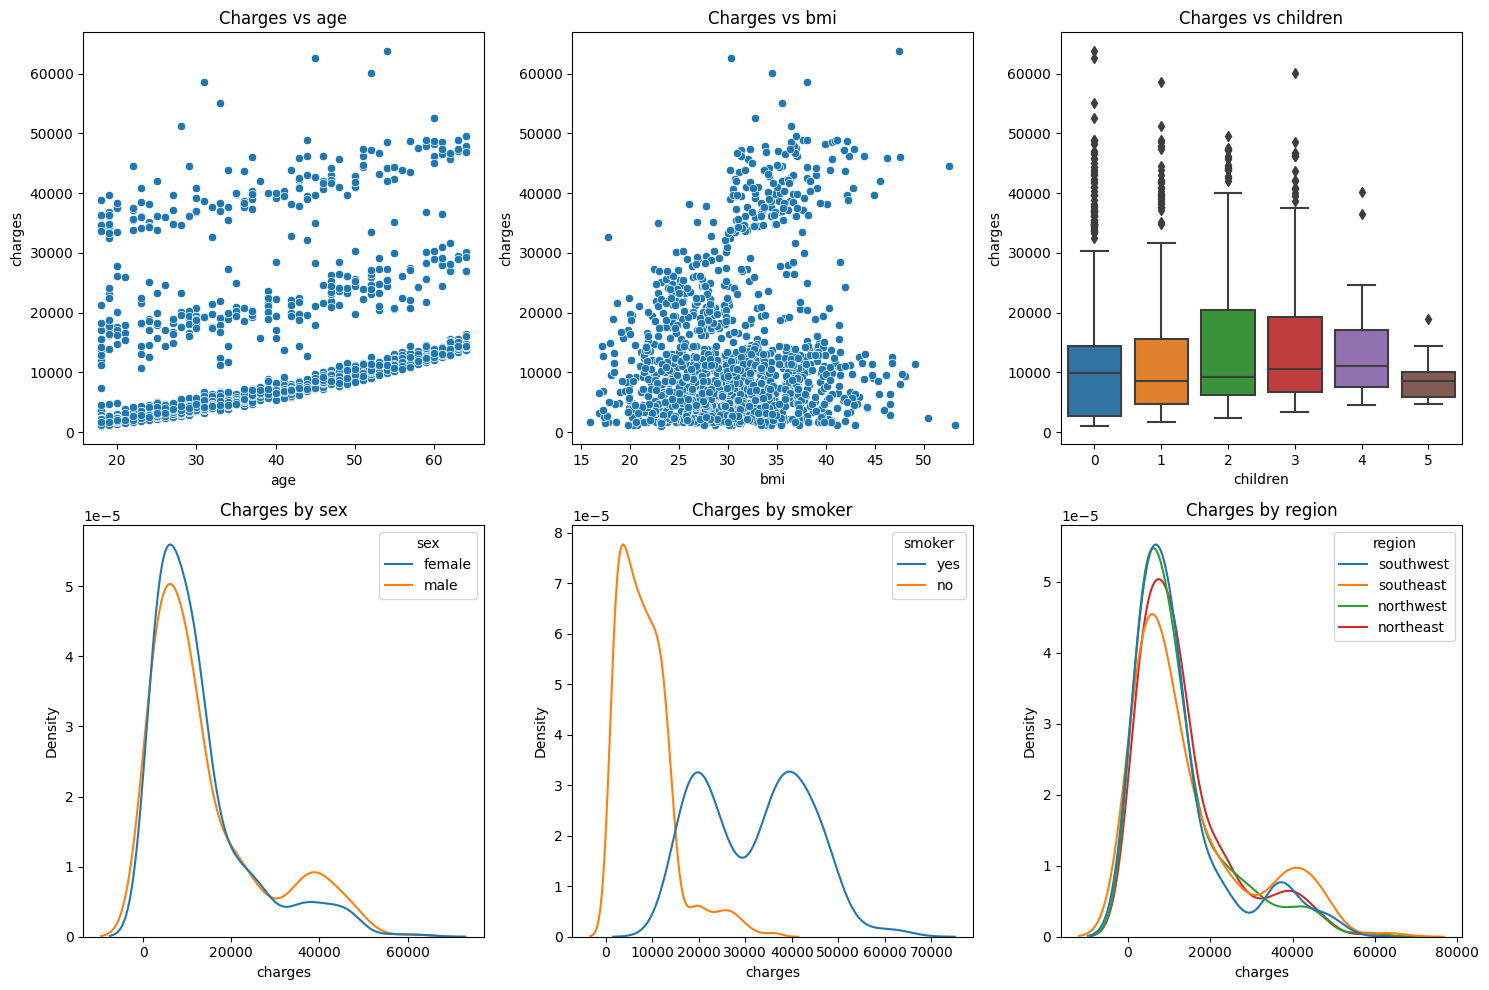

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = ['age', 'bmi']

numerical_discrete = ['children']

# Categorical features
categorical_features = ['sex', 'smoker', 'region']

# Create a figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over numerical features
for i, num_feature in enumerate(numerical_features):
    # Scatter plots for numerical vs numerical
    sns.scatterplot(x=num_feature, y='charges', data=df, ax=axes[0, i])
    axes[0, i].set_title(f'Charges vs {num_feature}')

for i, num_feature in enumerate(numerical_discrete):
    # Scatter plots for numerical vs numerical
    sns.boxplot(x=num_feature, y='charges', data=df, ax=axes[0, 2])
    axes[0, 2].set_title(f'Charges vs {num_feature}')


# Iterate over categorical features
for i, cat_feature in enumerate(categorical_features):
    # Kernel density plots for numerical vs categorical
    sns.kdeplot(x='charges', hue=cat_feature, data=df, common_norm=False, ax=axes[1, i])
    axes[1, i].set_title(f'Charges by {cat_feature}')

plt.tight_layout()
plt.show()

# Step 4: Sample Relationship of Charges with Features and Smoker (important feature visually)

Since smoker seems to be an important feature for predicting charges and age along with bmi shows important relationship, and segregated clusters of processes inside the individual scatterplots with charges, there seem to be a third variable involved in the scatterplots of age and bmi with charges. I suspec that is smoker. We will understand it based on the multivariate scatter plot of age, bmi, and children with charges, along with the third variable smoker, which colours each point in the scatterplot.

## Interpretation

* 

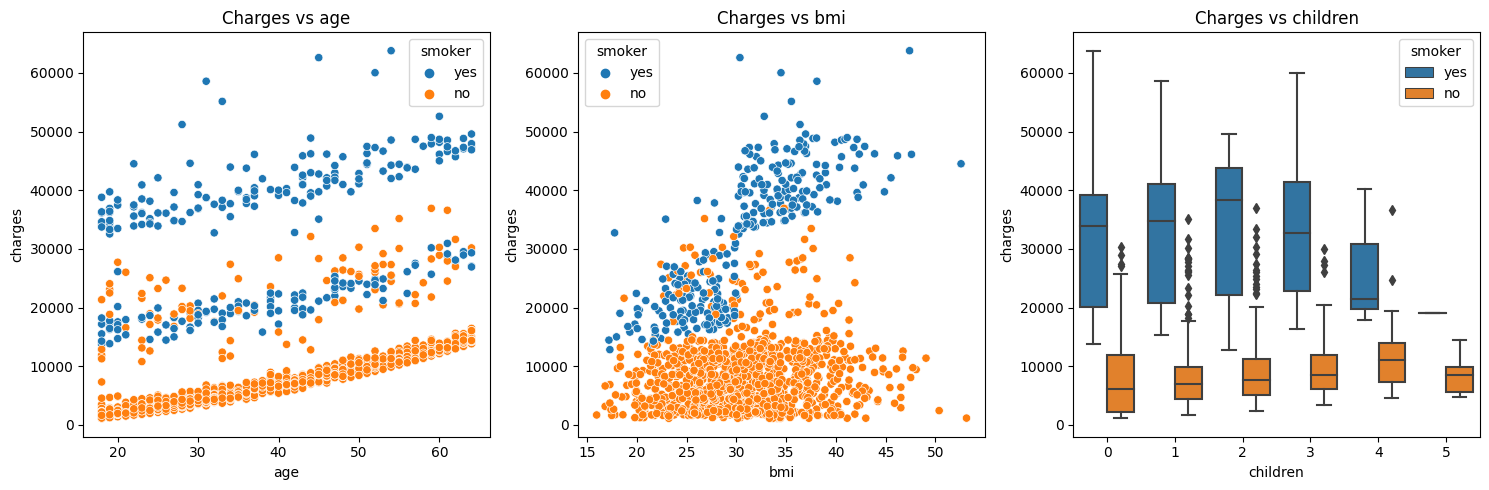

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = ['age', 'bmi']

numerical_discrete = ['children']

# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over numerical features
for i, num_feature in enumerate(numerical_features):
    # Scatter plots for numerical vs numerical, colored by smoker status
    sns.scatterplot(x=num_feature, y='charges', hue='smoker', data=df, ax=axes[i])
    axes[i].set_title(f'Charges vs {num_feature}')

for i, num_feature in enumerate(numerical_discrete):
    # Scatter plots for numerical vs numerical
    sns.boxplot(x=num_feature, y='charges', hue='smoker', data=df, ax=axes[2])
    axes[2].set_title(f'Charges vs {num_feature}')

plt.tight_layout()
plt.show()